Name: Poorani M

Adm No.: 21JE0661

Date: 04th March 2024

**Asignment 5 - Implementation of Neural Network**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/emnist-letters-train.csv")
data

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88795,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88796,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88797,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
split=0.75
x_train=np.array(data.iloc[0:int(20000*split),1:785].values)/255
y_train=np.array(data.iloc[0:int(20000*split),0].values)-1

x_test=np.array(data.iloc[int(20000*split)+1:20000,1:].values)/255
y_test=np.array(data.iloc[int(20000*split)+1:20000,0].values)-1

In [5]:
x_train.shape

(15000, 784)

In [6]:
X_train = x_train.transpose()
Y_train = y_train.reshape(1,y_train.shape[0])
X_test = x_test.transpose()
Y_test = y_test.reshape(1,y_test.shape[0])

In [7]:
Y_test.size

4999

In [12]:
class NeuralNetwork:
  def init_params():
    W1 = np.random.rand(50,784) - 0.5
    b1 = np.random.rand(50, 1) - 0.5
    W2 = np.random.rand(26, 50) - 0.5
    b2 = np.random.rand(26, 1) - 0.5
    return W1, b1, W2, b2

  def ReLU(Z):
      return np.maximum(Z, 0)

  def softmax(Z):
      A = np.exp(Z) / sum(np.exp(Z))
      return A

  def forward_prop(W1, b1, W2, b2, X):
      Z1 = W1@X + b1
      A1 = NeuralNetwork.ReLU(Z1)
      Z2 = W2@A1 + b2
      A2 = NeuralNetwork.softmax(Z2)
      return Z1, A1, Z2, A2

  def ReLU_deriv(Z):
      return Z > 0

  def one_hot(Y):
      one_hot_Y = np.zeros((Y.size, 26))
      one_hot_Y[np.arange(Y.size), Y] = 1
      one_hot_Y = one_hot_Y.T
      return one_hot_Y

  def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
      m = X.shape[1]
      one_hot_Y = NeuralNetwork.one_hot(Y)
      dZ2 = A2 - one_hot_Y
      dW2 = 1 / m * dZ2.dot(A1.T)
      db2 = 1 / m * np.sum(dZ2)
      dZ1 = W2.T.dot(dZ2) * NeuralNetwork.ReLU_deriv(Z1)
      dW1 = 1 / m * dZ1.dot(X.T)
      db1 = 1 / m * np.sum(dZ1)
      return dW1, db1, dW2, db2

  def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
      W1 = W1 - alpha * dW1
      b1 = b1 - alpha * db1
      W2 = W2 - alpha * dW2
      b2 = b2 - alpha * db2
      return W1, b1, W2, b2
  def get_predictions(A2):
      return np.argmax(A2, 0)

  def get_accuracy_woprint(predictions, Y):

      return np.sum(predictions == Y) / Y.size

  def get_accuracy_wprint(predictions, Y):

      print("Predicted :" ,predictions)
      print("Exact Data :" ,Y)
      print("\n")
      return np.sum(predictions == Y) / Y.size

  def accPlot(acc, iters):
      plt.plot(np.arange(iters), acc)
      plt.xlabel('Number of iterations')
      plt.ylabel('Accuracy')
      plt.show()

  def gradient_descent(X, Y, alpha, iterations,accuracy):
      W1, b1, W2, b2 = NeuralNetwork.init_params()
      for i in range(iterations+1):
          Z1, A1, Z2, A2 = NeuralNetwork.forward_prop(W1, b1, W2, b2, X)
          dW1, db1, dW2, db2 = NeuralNetwork.backward_prop(Z1, A1, Z2, A2, W1,
                                                           W2, X, Y)
          W1, b1, W2, b2 = NeuralNetwork.update_params(W1, b1, W2, b2, dW1, db1,
                                                       dW2, db2, alpha)
          if i <iterations:
              predictions = NeuralNetwork.get_predictions(A2)
              acc=NeuralNetwork.get_accuracy_woprint(predictions, Y)
              if i%100==0:
                print("Iteration: ", i , " Accuracy : ", acc*100,"\n")
              accuracy.append(acc)
      return W1, b1, W2, b2

  def test_net(W1,b1,W2,b2,X,y):
    Z1, A1, Z2, A2 = NeuralNetwork.forward_prop(W1, b1, W2, b2, X)
    predictions = NeuralNetwork.get_predictions(A2)
    print("Accuracy of the model ",NeuralNetwork.get_accuracy_wprint(predictions
                                                                  , y)*100,"%")



In [13]:
accuracy=[]
W1, b1, W2, b2 = NeuralNetwork.gradient_descent(X_train, Y_train, 0.8, 1000,accuracy)

Iteration:  0  Accuracy :  4.186666666666667 

Iteration:  100  Accuracy :  51.38666666666667 

Iteration:  200  Accuracy :  62.43333333333333 

Iteration:  300  Accuracy :  67.00666666666667 

Iteration:  400  Accuracy :  68.88666666666666 

Iteration:  500  Accuracy :  73.86666666666667 

Iteration:  600  Accuracy :  75.55333333333333 

Iteration:  700  Accuracy :  76.95333333333333 

Iteration:  800  Accuracy :  78.01333333333334 

Iteration:  900  Accuracy :  80.76666666666667 



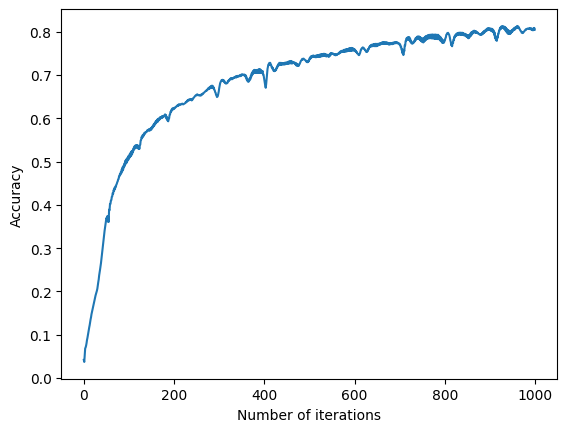

In [14]:
NeuralNetwork.accPlot(accuracy,1000)

In [15]:
NeuralNetwork.test_net(W1, b1, W2, b2, X_test, Y_test)

Predicted : [24 17 12 ... 24  0 11]
Exact Data : [[24 17 12 ... 24  0  2]]


Accuracy of the model  73.73474694938987 %
